# Logistic Regression: Binary Classification

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Load and prepare the IRIS sample dataset

We use the Iris Flower (dt. "Schwertlilie") dataset to demonstrate how logistic regression works.

The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


In [45]:
iris_db = load_iris(as_frame=True)

In [46]:
# Prepare the binary target labels
# We consider all Virginicas as <True>,  
y = iris_db.target_names[iris_db.target] == 'virginica'

### Visualization of the output space: Binary classification using a single input feature 

In [47]:
# We use a single feature ("petal width") for classification
x = iris_db.data[["petal width (cm)"]].values

In [48]:
# TODO: Train the logistic regression model

LogisticRegression(random_state=42)

In [59]:
# TODO: Sample some test features (petal width) in a regular interval

# TODO: Predict the probability that each sample belongs to the negative and positive class

# TODO: Choose the class with the higher probability as the final class prediction 

# Decision Boundary: The feature where the class probability becomes 0.5 (and the linear model kx+d becomes 0)
# 0=kx+d => x = -d/kx
decision_boundary = -model.intercept_[0] / model.coef_[0, 0]

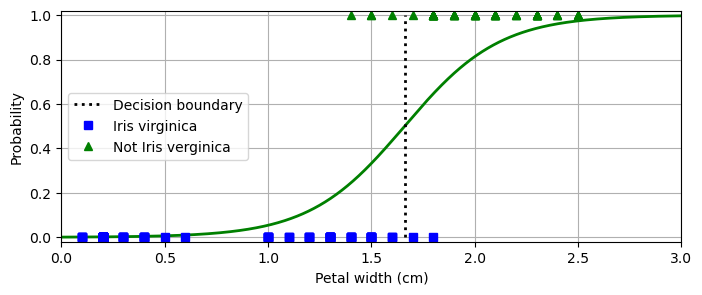

In [58]:
plt.figure(figsize=(8, 3))

# Plot the probability that each test sample belongs to the positive class (Verginica class).
plt.plot(x_test, y_test_proba[:, 1], "g-", linewidth=2)

# Show the decision boundary
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

# Plot some positive and negative samples
plt.plot(x[y == 0], y[y == 0], "bs", label='Iris virginica')
plt.plot(x[y == 1], y[y == 1], "g^", label='Not Iris verginica')

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

### Visualization of the output space: Binary classification using a two input feature 

In [83]:
# We use a two features ("petal width" and "petal length") for classification
x = iris_db.data[["petal length (cm)", "petal width (cm)"]].values

In [84]:
# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(x, y)

LogisticRegression(random_state=42)

In [85]:
# Sample some test features (petal length, petal width) in a regular interval
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1), 
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
x_test = np.c_[x0.ravel(), x1.ravel()]

# Predict the probability that each sample belongs to the negative and positive class
y_test_proba = model.predict_proba(x_test)

In [86]:
# Compute points that lie on the decision boundary
# 0 = k1*x1 + k2*x2 + d ==> x2 = -(d + k1*x1) / k2
x1_boundary = np.array([2.9, 7.])
x2_boundary = -((model.coef_[0, 0] * x1_boundary + model.intercept_[0]) / model.coef_[0, 1])

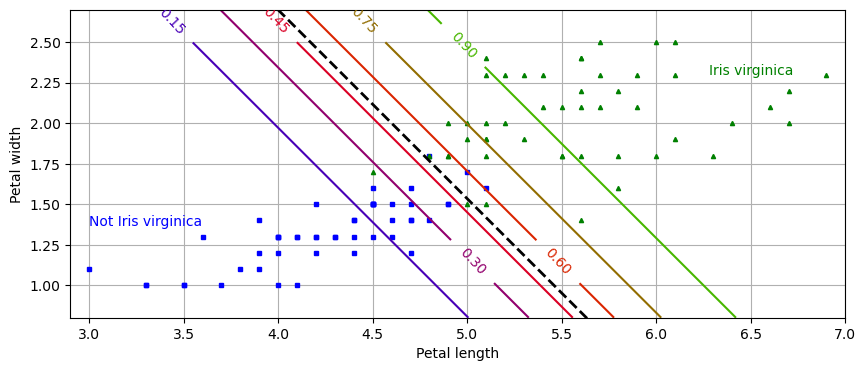

In [87]:
plt.figure(figsize=(10, 4))

# Plot some positive and negative samples
plt.plot(x[y == 0, 0], x[y == 0, 1], "bs", markersize=3)
plt.plot(x[y == 1, 0], x[y == 1, 1], "g^", markersize=3)

# Show contour lines that the probability
contour = plt.contour(x0, x1, y_test_proba[:, 1].reshape(x0.shape), cmap=plt.cm.brg)
plt.clabel(contour, inline=1)

# Show the decision boundary
plt.plot(x1_boundary, x2_boundary, "k--", linewidth=2)

plt.text(3.3, 1.37, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()